EDA

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('Online Sales Data.csv')

# Inspecting the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Data Cleaning
# Handle missing values
df = df.fillna(df.median(numeric_only=True))  # Replace numerical missing values with median
df = df.fillna("Unknown")  # Replace categorical missing values with 'Unknown'

# Removing the duplicates
df = df.drop_duplicates()

# Handling outliers using IQR
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Statistical Analysis
print("\nSummary Statistics:")
print(df.describe())

Dataset Preview:
   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data co

In [43]:
# Converting date columns 
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ensuring all numeric columns are used
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

#CORRELATION ANALYSIS
# Computing correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                Transaction ID  Units Sold  Unit Price  Total Revenue
Transaction ID        1.000000   -0.184639    0.009204      -0.128796
Units Sold           -0.184639    1.000000   -0.463534      -0.071020
Unit Price            0.009204   -0.463534    1.000000       0.813898
Total Revenue        -0.128796   -0.071020    0.813898       1.000000


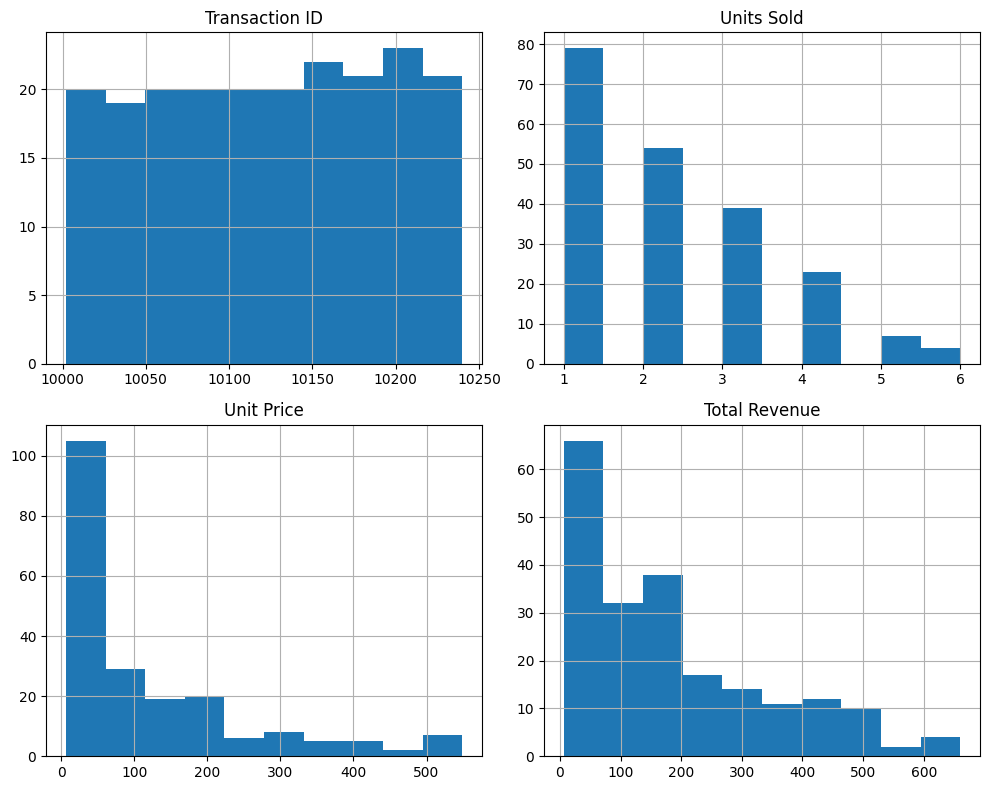

In [8]:
df[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

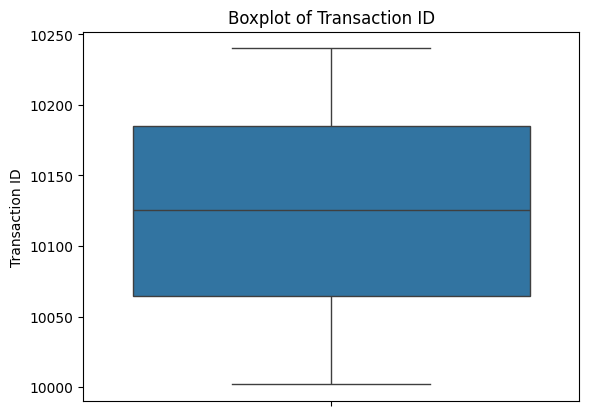

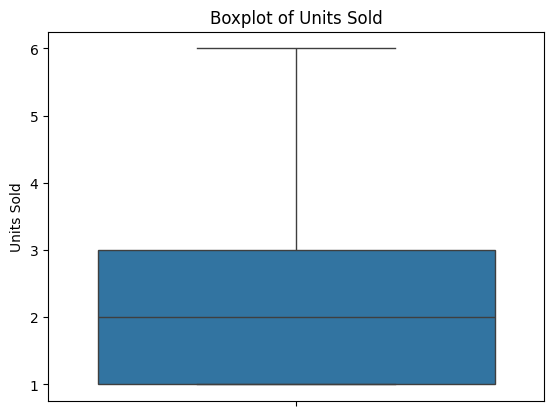

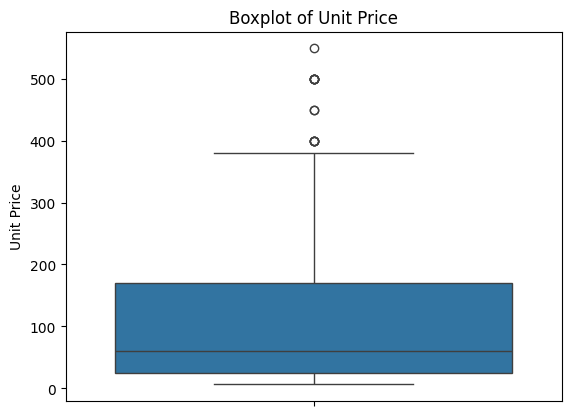

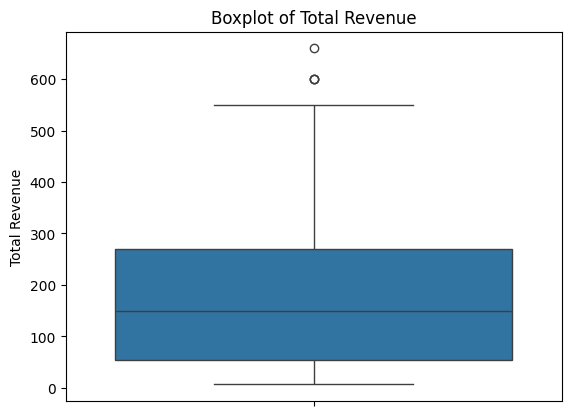

In [9]:
for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

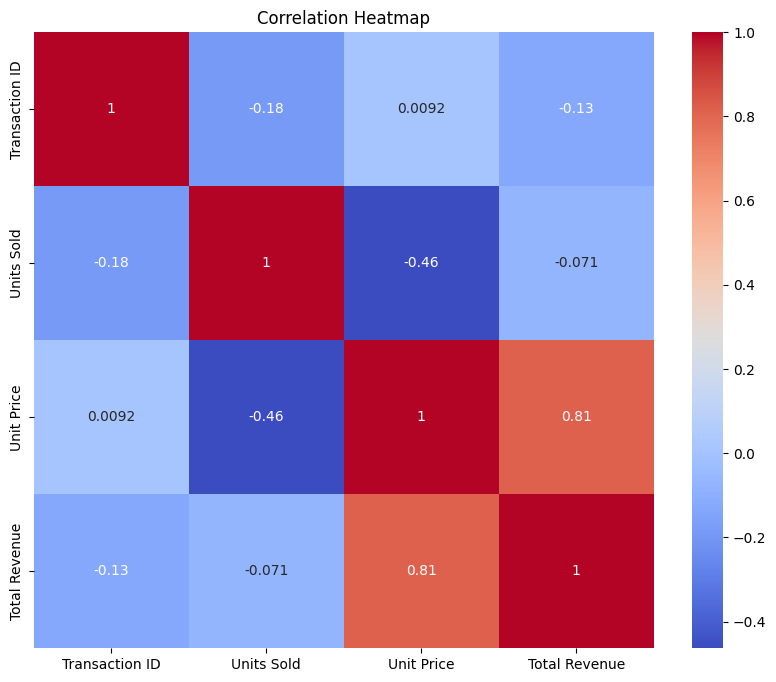

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

SALES PERFORMANCE ANALYSIS

In [37]:
#CALCULATING SALES VALUE USING UNITS SOLD AND UNIT PRICE
df['Sales'] = df['Units Sold'] * df['Unit Price']

In [38]:
#IMPORTING NECESSARY LIBRARIES 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Inspecting dataset
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())
print("Preview of Data:")
print(df.head())

Dataset Shape: (206, 10)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1 to 239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    206 non-null    int64         
 1   Date              206 non-null    datetime64[ns]
 2   Product Category  206 non-null    object        
 3   Product Name      206 non-null    object        
 4   Units Sold        206 non-null    int64         
 5   Unit Price        206 non-null    float64       
 6   Total Revenue     206 non-null    float64       
 7   Region            206 non-null    object        
 8   Payment Method    206 non-null    object        
 9   Sales             206 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 17.7+ KB
None
Missing Values:
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0


Sales Trends Over Time

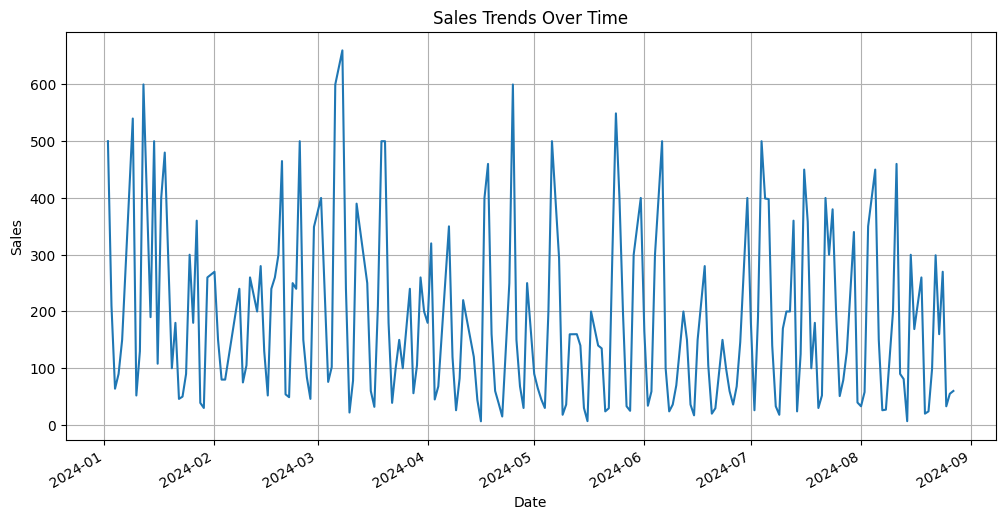

In [17]:
# Group sales by date
sales_trend = df.groupby('Date')['Sales'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

Unit Price Vs Toatal Revenue as Scatterplot

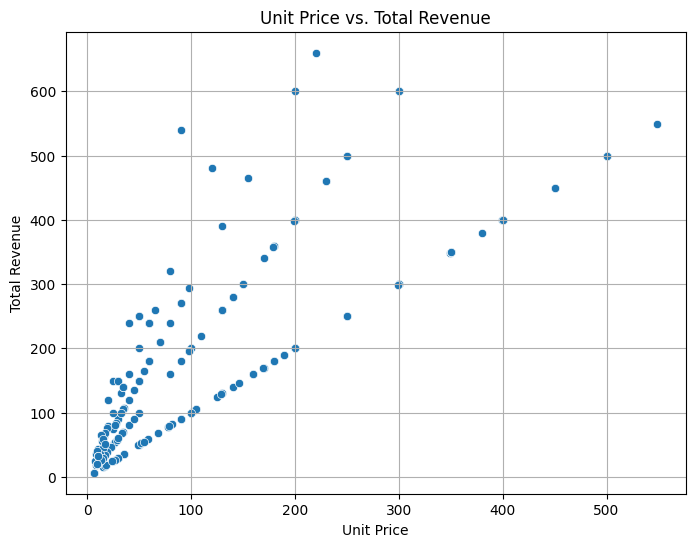

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df)
plt.title('Unit Price vs. Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

Sales by Region and Category

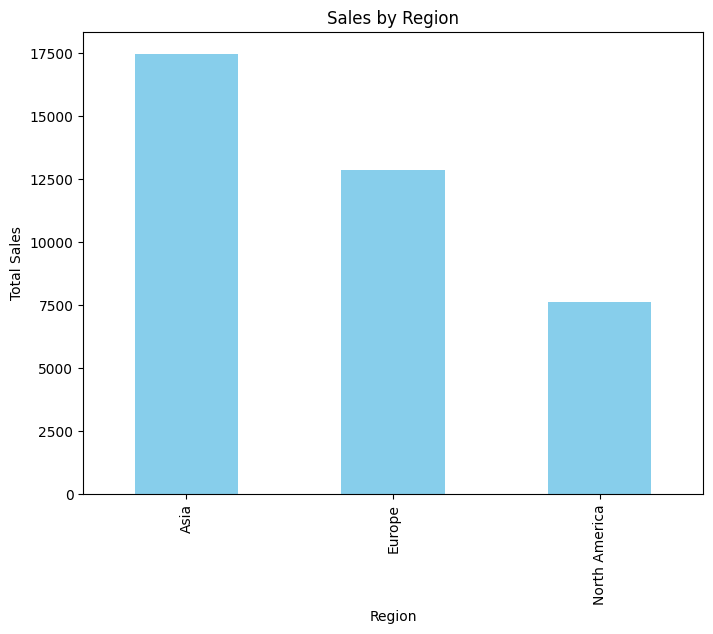

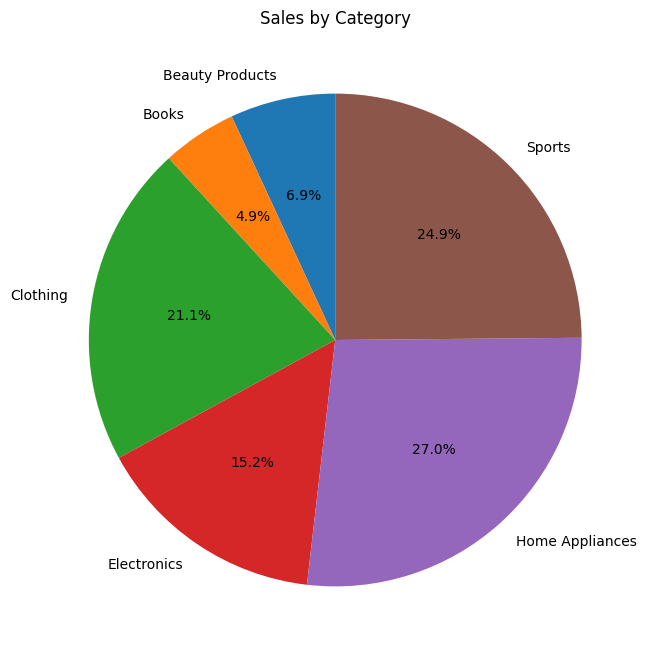

In [28]:
# Bar plot for sales by region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Pie chart for sales by category
category_sales = df.groupby('Product Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Sales by Category')
plt.ylabel('')  # Remove y-axis label
plt.show()

PREDICTIVE MODELLING

Preparing the data

In [33]:
# Select features and target
X = df[['Unit Price', 'Total Revenue']]
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Linear Regression Model

In [34]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


MODEL EVALUATION

In [35]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 0.00
R² Score: 1.00
